# Simulación del problema de Monty Hall

## Definición de funciones útiles
Defino algunas funciones útiles a utilizar

### Pick host door
Esta función selecciona la puerta del host del programa, sabiendo la puerta elegida por el concursante y la puerta en la que se encuentra el auto.

In [13]:
import random

def pick_host_door(car_pick, guest_pick):
    doors = [1,2,3]
    if car_pick == guest_pick:
        doors.remove(car_pick)
    else:
        doors.remove(car_pick)
        doors.remove(guest_pick)
    return doors[random.randint(0,len(doors) - 1)]





### Pick random door

Esta función es utilizada para elegir una de las 3 puertas, de forma aleatoria. Usada para inicializar la puerta del auto y para escoger una puerta al azar por parte del concursante.

In [14]:
def pick_random_door():
    return random.randint(1,3)




### Guest switch doors
Función utilizada por el concursante para cambiar de puerta, basada en la puerta abierta por el host y la puerta anteriormente escogida.

In [15]:
def guest_switch_doors(host_pick, guest_pick):
    guest_doors = [1,2,3]
    guest_doors.remove(host_pick)
    guest_doors.remove(guest_pick)
    return guest_doors[0]


### Guest random doors
Función utilizada por el concursante para cambiar de puerta de forma aleatoria, sin tomar en cuenta la puerta escogida anteriormente.

In [16]:
def guest_random_doors(host_pick):
    guest_doors = [1,2,3]
    guest_doors.remove(host_pick)
    return guest_doors[random.randint(0,1)]

## Desarrollo del problema

Lo que vamos a hacer es una simulación del problema de Monty Hall utilizando 3 estrategias:

1.   Mantener siempre la puerta escogida, sin importar la nueva información
2.   Cambiar de puerta al azar, es decir, elegir aleatoriamente si cambiar o no de  puerta  a  partir de  la nueva información
3.   Cambiar siempre de puerta, a la puerta que no  escogió anteriormente el participante

Lo que buscamos con esta simulación es comprobar si realmente existe mayor probabilidad de ganar escogiendo la estrategia 3.



In [17]:
hits_not_switching = 0
hits_switching = 0
hits_random = 0

hits_not_switching_acc = []
hits_switching_acc = []
hits_random_acc = []

simulation_runs = 1000

for i in range(simulation_runs):
  # seleccionar al azar una puerta para el auto
  car_door = pick_random_door()
  # seleccionar al azar una puerta para el concursante
  guest_door = pick_random_door()
  # seleccionar al azar una puerta para el host, basado en la puerta del auto y la puerta del concursante
  host_door = pick_host_door(car_door, guest_door)
  
  # contar un hit si se ganó sin cambiar de puerta
  hits_not_switching = hits_not_switching + 1 if car_door == guest_door else hits_not_switching

  # contar un hit si se ganó cambiando de puerta
  guest_switch_door = guest_switch_doors(host_door, guest_door)
  hits_switching = hits_switching + 1 if car_door == guest_switch_door else hits_switching

  # contar un hit si se ganó eligiendo entre las dos puertas restantes aleatoriamente
  guest_random_door = guest_random_doors(host_door)
  hits_random = hits_random + 1 if car_door == guest_random_door else hits_random

  # guardar hits acumulados para la iteración actual las listas acumuladas
  hits_not_switching_acc.append(hits_not_switching)
  hits_switching_acc.append(hits_switching)
  hits_random_acc.append(hits_random)

# Imprimir resultados finales de la simulación
print('Total runs: ', simulation_runs)
print('hits not switching: ', hits_not_switching)
print('hits switching: ', hits_switching)
print('hits random: ', hits_random)

Total runs:  1000
hits not switching:  312
hits switching:  688
hits random:  494


## Gráfica de los resultados acumulados
En esta gráfica, utilizamos **Matplotlib** para graficar el resultado acumulado de cada estrategia que puede usar el concursante. Como se puede observar, la estrategia de mantener la puerta previamente escogida es la peor de las estrategias, ganando aproximadamente 1/3 de las veces.
Luego le sigue la opción de  cambiar de puerta de  forma aleatoria. Ganando aproximadamente la mitad de las veces.
Por último tenemos la estrategia de siempre cambiar  de puerta. Esta estrategia obtuvo el premio 2/3 de las veces.



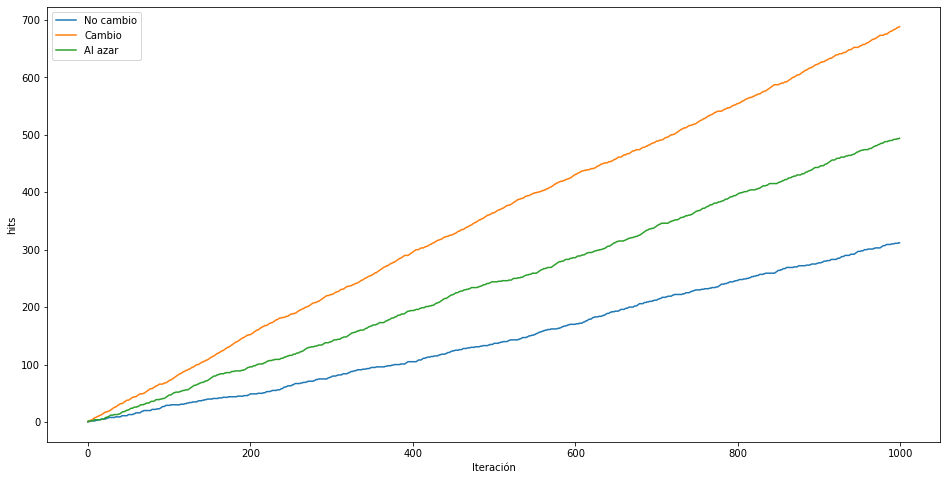

In [18]:
from matplotlib import pyplot as plt

plt.figure(figsize=(16,8))
plt.plot(hits_not_switching_acc, label='No cambio')
plt.plot(hits_switching_acc, label='Cambio')
plt.plot(hits_random_acc, label='Al azar')
plt.xlabel('Iteración')
plt.ylabel('hits')
plt.legend()
plt.show()